## 다이나믹 프로그래밍
다음 환경(**GridWorldEnvironment**)을 가지고 가치 이터레이션, 정책 이터레이션을 구현하세요.

## GridWorldEnvironment
```py
start_point = (0,0)
end_point = (4,4)
gridworld_size = (5,5)
env = GridWorldEnvironment(start_point, end_point, grid_world_size)
```

## Original Code

In [1]:
import numpy as np
from typing import Tuple

class GridWorldEnvironment:
    def __init__(self, start_point:Tuple, end_point:Tuple, grid_world_size:Tuple):
        # 시작점과 끝점을 받는다.
        self.start_point = start_point
        self.end_point = end_point if end_point != (-1,-1) else (grid_world_size[0] + end_point[0],
                                                                 grid_world_size[1] + end_point[1])

        # 그리드 월드의 규격을 받는다.
        self.width, self.height = grid_world_size

        # action dictionary
        self.action_space = ['up', 'down', 'left', 'right']
        self.num_actions = len(self.action_space)
        self.actions = {'up':(-1,0),
                        'down':(1,0),
                        'left':(0,-1),
                        'right':(0,1) }

        # 상태 : 좌표로 나타남
        self.traces = []

        # total states
        self.total_states = []
        for x in range(self.width):
            for y in range(self.height):
                self.total_states.append((x,y))

        # reward
        self.reward = np.zeros(shape=(self.height, self.width)).tolist()
        self.reward[end_point[0]][end_point[1]] = 1 # endpoint에서만 reward

    def render(self):
        # 그리드 월드의 상태를 출력한다.
        self.grid_world = np.full(shape=(self.height, self.width), fill_value=".").tolist()

        last_point = self.traces[-1] # 에이전트가 가장 마지막에 있었던 위치
        traces = list(set(self.traces)) # 중복된 값을 삭제하기 위함
        for trace in traces:
            self.grid_world[trace[0]][trace[1]] = "X"

        self.grid_world[self.start_point[0]][self.start_point[1]] = "S" # start point
        self.grid_world[self.end_point[0]][self.end_point[1]] = "G" # end point
        self.grid_world[last_point[0]][last_point[1]] = "A" # 현재 에이전트의 위치

        # string으로 출력한다.
        grid = ""

        for i in range(self.height):
            for j in range(self.width):
                grid += self.grid_world[i][j]+" "
            grid += "\n"

        print(grid)

    def get_reward(self, state, action_idx):
        next_state = self.state_after_action(state, action_idx)
        return self.reward[next_state[0]][next_state[1]]

    def state_after_action(self, state, action_idx:int):
        action = self.action_space[action_idx]
        row_movement, col_movement = self.actions[action]

        # action에 따라 에이전트 이동
        next_state = (state[0]+row_movement, state[1]+col_movement)
        next_state = self.check_boundary(next_state)

        return next_state

    def check_boundary(self, state):
        state = list(state)
        state[0] = (0 if state[0] < 0 else self.height - 1 if state[0] > self.height - 1 else state[0])
        state[1] = (0 if state[1] < 0 else self.width - 1 if state[1] > self.width - 1 else state[1])
        return tuple(state)

## Own Code
위 환경 클래스를 상속 받아 `env.render` 코드를 구현하세요.

In [2]:
class OwnGridWorldEnvironment(GridWorldEnvironment):
    def __init__(self, start_point:Tuple, end_point:Tuple, grid_world_size:Tuple):
        super().__init__(start_point, end_point, grid_world_size)

    def step(env, action_idx):
        next_state = env.state_after_action(env.current_state, action_idx)
        env.current_state = next_state
        env.traces.append(env.current_state)
        return next_state, env.get_reward(env.current_state, action_idx)

# Example
start_point = (0, 0)
end_point = (4, 4)
gridworld_size = (5, 5)

env = OwnGridWorldEnvironment(start_point, end_point, gridworld_size)
env.current_state = start_point
env.traces.append(start_point)

print("Initial GridWorld:")
env.render()

actions = ['right', 'right', 'down', 'down', 'down', 'right', 'right', 'down']
action_map = {'up': 0, 'down': 1, 'left': 2, 'right': 3}

for action in actions:
    env.step(action_map[action])
    print(f"After action '{action}':")
    env.render()


Initial GridWorld:
A . . . . 
. . . . . 
. . . . . 
. . . . . 
. . . . G 

After action 'right':
S A . . . 
. . . . . 
. . . . . 
. . . . . 
. . . . G 

After action 'right':
S X A . . 
. . . . . 
. . . . . 
. . . . . 
. . . . G 

After action 'down':
S X X . . 
. . A . . 
. . . . . 
. . . . . 
. . . . G 

After action 'down':
S X X . . 
. . X . . 
. . A . . 
. . . . . 
. . . . G 

After action 'down':
S X X . . 
. . X . . 
. . X . . 
. . A . . 
. . . . G 

After action 'right':
S X X . . 
. . X . . 
. . X . . 
. . X A . 
. . . . G 

After action 'right':
S X X . . 
. . X . . 
. . X . . 
. . X X A 
. . . . G 

After action 'down':
S X X . . 
. . X . . 
. . X . . 
. . X X X 
. . . . A 



# 01. 정책 이터레이션
- 스켈레톤 코드  
`init` 부를 제외한 나머지 매소드를 채워주세요.

In [31]:
np.full(shape = (5, 5, 4), fill_value = 1/4).tolist()

[[[0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25]],
 [[0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25]],
 [[0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25]],
 [[0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25]],
 [[0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25],
  [0.25, 0.25, 0.25, 0.25]]]

In [4]:
class PolicyIteration:
    def __init__(self,env):
        # about env
        self.env = env
        self.action_space = env.action_space # ['up', 'down', 'left', 'right'] 차례대로 (-1,0) (1,0) (0,-1) (0,1)
        self.num_action = len(self.action_space)

        # value 2d list
        self.value_table = np.zeros(shape = (self.env.height, self.env.width)).tolist() # (5,5)

        # 상하좌우 동일한 확률을 가지는 정책으로 초기화
        self.policy_table = np.full(shape = (self.env.height, self.env.width, self.num_action), fill_value = 1/self.num_action).tolist() # ex (5,5,4)

        # end state 에서는 어떠한 행동도 할 필요가 없어서 policy table을 비운다.
        self.policy_table[env.end_point[0]][env.end_point[1]] = []

        self.gamma = 0.9 # 할인율

    def get_policy(self, state):
        return self.policy_table[state[0]][state[1]] # (4,)

    def get_action(self, state):
        policy = self.get_policy(state)
        return np.random.choice(self.num_action, 1, p = policy)[0]

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

    def policy_evaluation(self):
        next_value_table = np.zeros(shape = (self.env.height, self.env.width)).tolist()
        for state in self.env.total_states:
            value = 0.0

            if state == self.env.end_point:
                next_value_table[state[0]][state[1]] = 0.0 # endpoint에서의 value function = 0

            else:
                state_policy = self.get_policy(state) # (4,)

                for action_idx in range(self.num_action):
                    # 벨만 기대 방정식
                    next_state = self.env.state_after_action(state, action_idx)
                    reward = self.env.get_reward(state, action_idx)
                    next_value = self.get_value(next_state)
                    value += (state_policy[action_idx] * (reward + self.gamma * next_value))

                next_value_table[state[0]][state[1]] = value

        self.value_table = next_value_table

    def policy_improvement(self):
        next_policy = self.policy_table # (5,5,4)

        for state in self.env.total_states:
            if state == self.env.end_point:
                continue

            value_list = []
            result = [0.0, 0.0, 0.0, 0.0]

            for action_idx in range(self.num_action):
                next_state = self.env.state_after_action(state, action_idx)
                reward = self.env.get_reward(state, action_idx)
                next_value = self.get_value(next_state)
                value = reward + self.gamma * next_value
                value_list.append(value)

            max_idx_list = np.argwhere(value_list == np.amax(value_list))
            max_idx_list = max_idx_list.flatten().tolist()
            prob = 1/len(max_idx_list)

            for idx in max_idx_list:
                result[idx] = prob

            next_policy[state[0]][state[1]] = result

        self.policy_table = next_policy


## 정책 이터레이션 실행
정의한 클래스를 이용해 정책 이터레이션을 실행해 주세요.

In [15]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           grid_world_size=(5,5))

pi = PolicyIteration(env)

EPISODES = 20
RENDER_END = True
total_moves = []

In [6]:
for epi in range(EPISODES):
    move_cnt = 0
    env.traces = []
    state = env.start_point

    pi.policy_evaluation()
    pi.policy_improvement()

    while state != env.end_point:
        action_idx = pi.get_action(state)
        next_state = env.state_after_action(state, action_idx)
        state = next_state

        env.traces.append(state)
        move_cnt += 1

    total_moves.append(move_cnt)

    print(f"episode: {epi+1} / {EPISODES} __ move_cnt : {move_cnt}")

    if RENDER_END:
        env.render()

episode: 1 / 20 __ move_cnt : 19
S . . . . 
X X X X X 
. X . . X 
. X . . X 
. . . . A 

episode: 2 / 20 __ move_cnt : 41
S X X X . 
X X X X . 
X X X . . 
. X X X X 
. . . . A 

episode: 3 / 20 __ move_cnt : 12
S X X X X 
. . . . X 
. . . . X 
. . . . X 
. . . . A 

episode: 4 / 20 __ move_cnt : 11
S . . . . 
X . . . . 
X X X . . 
. . X . . 
. . X X A 

episode: 5 / 20 __ move_cnt : 10
S . . . . 
X X . . . 
. X X X X 
. . . . X 
. . . . A 

episode: 6 / 20 __ move_cnt : 8
S . . . . 
X . . . . 
X . . . . 
X X . . . 
. X X X A 

episode: 7 / 20 __ move_cnt : 8
S . . . . 
X X . . . 
. X . . . 
. X . . . 
. X X X A 

episode: 8 / 20 __ move_cnt : 8
S . . . . 
X . . . . 
X . . . . 
X . . . . 
X X X X A 

episode: 9 / 20 __ move_cnt : 8
S X . . . 
. X . . . 
. X X . . 
. . X . . 
. . X X A 

episode: 10 / 20 __ move_cnt : 8
S . . . . 
X . . . . 
X . . . . 
X . . . . 
X X X X A 

episode: 11 / 20 __ move_cnt : 8
S . . . . 
X X . . . 
. X . . . 
. X X X X 
. . . . A 

episode: 12 / 20 __ move_

## 학습에서 중요한 정보
학습이 되고 있는 것을 판단할 수 있는 파라미터를 찾아 시각화해 주세요.

In [9]:
import matplotlib.pyplot as plt

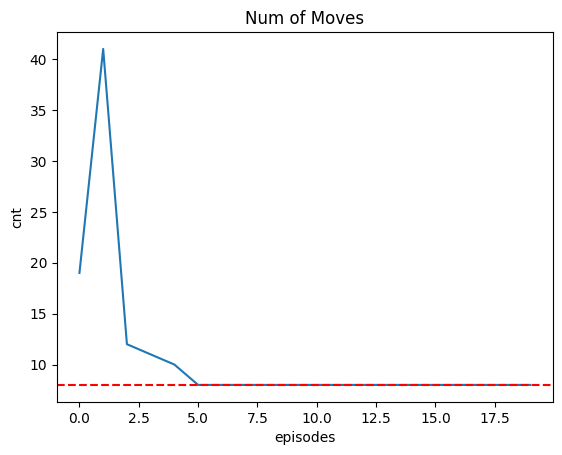

In [10]:
plt.plot(total_moves)
plt.axhline(y=min(total_moves), color='r', linestyle='--')
plt.ylabel("cnt")
plt.xlabel("episodes")
plt.title("Num of Moves")
plt.show()

# 02. 가치 이터레이션
- 스켈레톤 코드  
`init` 부를 제외한 나머지 매소드를 채워주세요.

In [22]:
class ValueIteration:
    def __init__(self, env):

        self.env = env
        self.action_space = env.action_space
        self.num_actions = env.num_actions

        # value 2d list
        self.value_table = np.zeros(shape=(self.env.height, self.env.width)).tolist() # (5,5)

        self.gamma = 0.9 # 할인율

    def value_iteration(self):
        next_value_table = np.zeros(shape = (self.env.height, self.env.width)).tolist() # (5,5)

        for state in self.env.total_states:
            if state == self.env.end_point:
                next_value_table[state[0]][state[1]] = 0.0
                continue

            # 벨만 최적방정식
            value_list = []

            for action_idx in range(self.num_actions):
                next_state = self.env.state_after_action(state, action_idx)
                reward = self.env.get_reward(state, action_idx)
                next_value = self.get_value(next_state)
                value = reward + self.gamma * next_value
                value_list.append(value)

            next_value_table[state[0]][state[1]] = max(value_list)

        self.value_table = next_value_table


    def get_action(self, state):
        if state == self.env.end_point:
            return []

        value_list = []
        for action_idx in range(self.num_actions):
            next_state = self.env.state_after_action(state, action_idx)
            reward = self.env.get_reward(state, action_idx)
            next_value = self.get_value(next_state)
            value = reward + self.gamma * next_value
            value_list.append(value)

        max_idx_list = np.argwhere(value_list == np.amax(value_list))
        max_idx_list = max_idx_list.flatten().tolist()

        return np.random.choice(max_idx_list)

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]


## 가치 이터레이션 실행
정의한 클래스를 이용해 정책 이터레이션을 실행해 주세요.

In [23]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           grid_world_size=(5,5))

vi = ValueIteration(env)

EPISODES = 15
RENDER_END = True
total_moves = []

In [24]:
for epi in range(EPISODES):
    move_cnt = 0
    env.traces = [] # traces 초기화
    state = env.start_point

    vi.value_iteration()

    while state != env.end_point:
        action_idx = vi.get_action(state)
        next_state = env.state_after_action(state, action_idx)
        state = next_state

        env.traces.append(state)
        move_cnt += 1

    total_moves.append(move_cnt)

    print(f"episode: {epi+1} / {EPISODES} __ move_cnt : {move_cnt}")

    if RENDER_END:
        env.render()

episode: 1 / 15 __ move_cnt : 32
S X . . . 
X . X X . 
X X X X . 
X X X X . 
. . . X A 

episode: 2 / 15 __ move_cnt : 80
S X X X X 
X X X X . 
X X X . . 
X X X . . 
. . X X A 

episode: 3 / 15 __ move_cnt : 9
S . . . . 
X X . . . 
. X X . . 
. . X . . 
. . X X A 

episode: 4 / 15 __ move_cnt : 21
S X . . . 
X X . . . 
X X . . . 
. X . . . 
. X X X A 

episode: 5 / 15 __ move_cnt : 8
S . . . . 
X . . . . 
X . . . . 
X X X X . 
. . . X A 

episode: 6 / 15 __ move_cnt : 8
S . . . . 
X . . . . 
X X X . . 
. . X . . 
. . X X A 

episode: 7 / 15 __ move_cnt : 8
S X . . . 
. X X X . 
. . . X . 
. . . X . 
. . . X A 

episode: 8 / 15 __ move_cnt : 8
S . . . . 
X X X . . 
. . X . . 
. . X . . 
. . X X A 

episode: 9 / 15 __ move_cnt : 8
S . . . . 
X . . . . 
X X X . . 
. . X . . 
. . X X A 

episode: 10 / 15 __ move_cnt : 8
S . . . . 
X X X X . 
. . . X X 
. . . . X 
. . . . A 

episode: 11 / 15 __ move_cnt : 8
S . . . . 
X X X X . 
. . . X . 
. . . X . 
. . . X A 

episode: 12 / 15 __ move_cn

## 학습에서 중요한 정보
학습이 되고 있는 것을 판단할 수 있는 파라미터/요소를 찾아 시각화해 주세요.

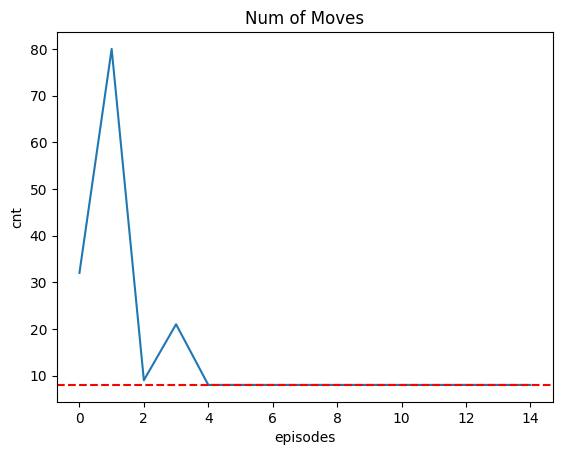

In [25]:
plt.plot(total_moves)
plt.axhline(y=min(total_moves), color='r', linestyle='--')
plt.ylabel("cnt")
plt.xlabel("episodes")
plt.title("Num of Moves")
plt.show()